In [37]:
#https://yulab-smu.top/treedata-book/chapter6.html 
require('ggplot2')# || install.packages('ggplot2', dependencies = TRUE)
require('BiocManager')# || install.packages('BiocManager', dependencies = TRUE)
require('ggtree')# || BiocManager::install('ggtree')
require('ggtreeExtra')# || BiocManager::install('ggtreeExtra')
require('treeio')
require('tidytree')
require('dplyr')
require('ggstar')
require('TDbook')
require('stringr')
require('plotly')
options(repr.plot.width=20, repr.plot.height=20)

In [78]:
listcolor <- c('#FF0029','#377EB8','#66A61E','#984EA3','#00D2D5','#FF7F00','#AF8D00','#7F80CD','#B3E900','#C42E60','#A65628',
               '#F781BF','#8DD3C7','#BEBADA','#FB8072','#80B1D3','#FDB462','#FCCDE5','#99A893','#EED5D2','#3F00FF','#DABF86')
name <- 'influenza_segment_4'

In [79]:
centroid <- read.csv(paste0('centroids_', name, '.csv'), header = TRUE, sep = ',')
centroid$H <- factor(centroid$H, levels=str_sort(levels(as.factor(centroid$H)), numeric = TRUE))

In [80]:
tree <- read.tree(paste0('centroids_', name, '.fasta.tree'))

In [81]:
cls <- split(centroid$accession, centroid$H)
treegroup <- groupOTU(tree, cls) 

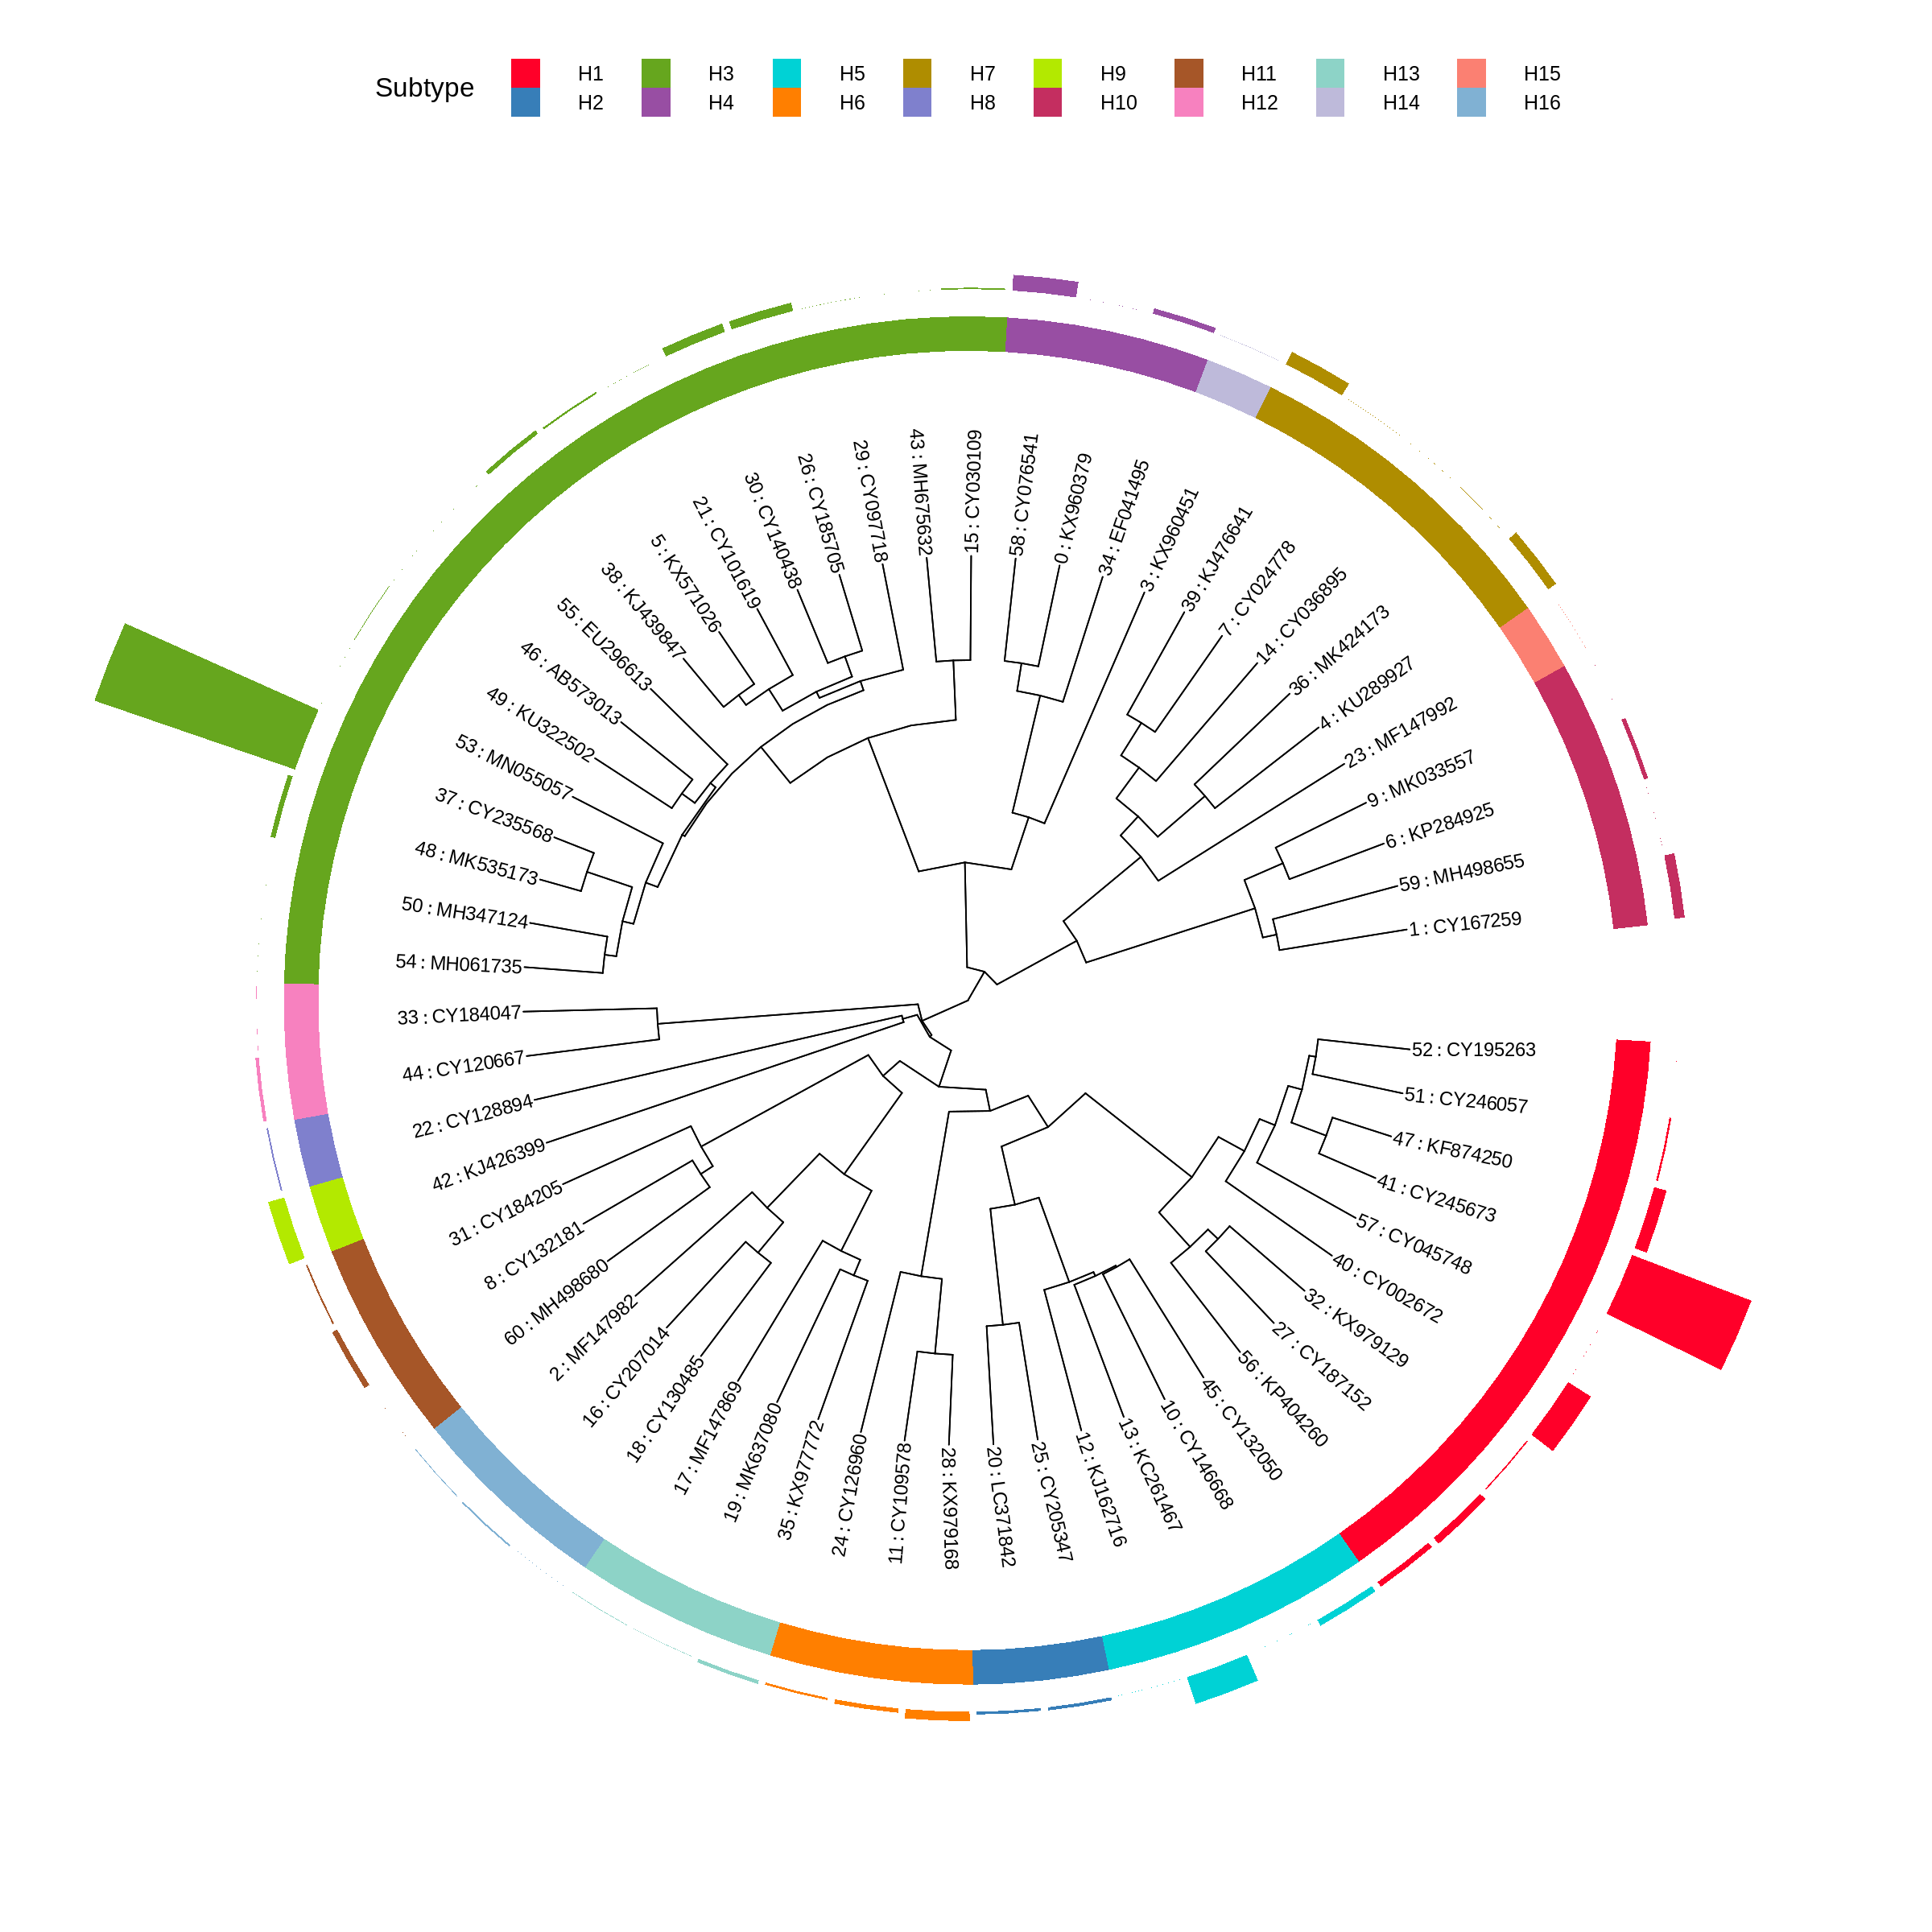

In [82]:
p <- ggtree(treegroup, layout='circular')
p <- p %<+% centroid
p1 <- p + geom_tree() +  
    #xlim(-1, 1) +
    geom_tiplab(aes(label=paste0(cluster, ':', label)), parse=T, size = 5, align=TRUE) +
    #geom_tiplab(size = 5, align=TRUE, linesize=.25) + 
    #geom_text(aes(label=label)) + 
    geom_fruit(
         geom=geom_tile,
         mapping=aes(fill=H),
         width=0.05,
         offset=0.5
    ) +
    geom_fruit(
        geom=geom_bar,
        mapping=aes(
            y=label, 
            x=size, 
            fill=H
        ),
        pwidth=0.5, 
        orientation="y", 
        stat="identity",
        offset=0.1,
    ) + 
    scale_fill_manual(
         name="Subtype",
         values=listcolor,
         guide=guide_legend(
            keywidth=1.5,
            keyheight=1.5,
            order=3,
            nrow=2
         ),
         na.translate=FALSE
    ) + 
    theme(
        legend.title=element_text(size=20), 
        legend.text=element_text(size=15),
        legend.position = 'top', 
        legend.spacing.x = unit(1, 'cm'),
        legend.margin = margin(t = 0, l = 0, b = -7.5, r = 0, unit='cm'),
#        legend.key.height=unit(3,"line"),
#        legend.key.width=unit(3,"line")
        plot.margin = margin(t = 0, l = -5, b = -7.5, r = -5, unit='cm')
    )
plot(p1)
ggsave(paste0('centroids_', name, '.pdf'), width = 50, height = 50, units = "cm", limitsize = FALSE)

In [86]:
vectors <- read.csv(paste0('vectors_', name, '.csv'), header = TRUE, sep = ',')
cluster <- read.csv(paste0('cluster_', name, '.csv'), header = TRUE, sep = ',')
cluster$H <- factor(cluster$H, levels=str_sort(levels(as.factor(cluster$H)), numeric = TRUE))
vecjoin <- inner_join(vectors, cluster, by = 'accession')

In [159]:
fig <- plot_ly(vecjoin, 
               x = ~x, 
               y = ~y, 
               z = ~z, 
               color = ~H, 
               colors = listcolor, 
               type = 'scatter3d', 
               mode = 'markers',
               marker = list(symbol = 'circle', size = 1),
               text = ~paste('Host:', host, '<br>Subtype:', subtype, '<br>Year:', year, '<br>Accession:', accession),
               width = 1200, 
               height = 1200
              )

fig <- fig %>% layout(scene = list(xaxis = list(title = 'PCA1',
                                                #gridcolor = 'rgb(255, 255, 255)',
                                                #zerolinewidth = 1,
                                                #ticklen = 5,
                                                #gridwidth = 2,
                                                range = c(-1.0, 1.0)
                                               ),
                                   yaxis = list(title = 'PCA2',
                                                #gridcolor = 'rgb(255, 255, 255)',
                                                #zerolinewidth = 1,
                                                #ticklen = 5,
                                                #gridwidth = 2,
                                                range = c(-1.0, 1.0)
                                               ),
                                   zaxis = list(title = 'PCA3',
                                                #gridcolor = 'rgb(255, 255, 255)',
                                                #zerolinewidth = 1,
                                                #ticklen = 5,
                                                #gridwidth = 2,
                                                range = c(-1.0, 1.0)
                                               ),
                                   paper_bgcolor = 'rgb(243, 243, 243)',
                                   plot_bgcolor = 'rgb(243, 243, 243)',
                                   aspectmode = 'cube'
                                  ),
                      autosize = TRUE,
                      margin = c(l=0, r=0, b=0, t=0), 
                      #title = 'Life Expectancy v. Per Capita GDP, 2007',
                      legend = list(orientation = 'v',
                                    yanchor = 'middle',
                                    y = 0.5,
                                    itemsizing='constant'
                                   )
                     )

embed_notebook(fig)
htmltools::save_html(fig, "test.html")